In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

sns.set()

2023-07-04 11:25:37.258851: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-04 11:25:37.269901: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:25:37.345231: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:25:37.345720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 11:25:37.868678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
y_train=train['label']
x_train=train.drop('label',axis=1)

<Axes: xlabel='label', ylabel='count'>

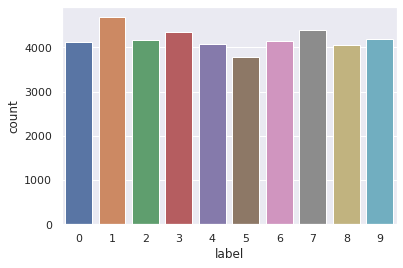

In [6]:
sns.countplot(x=y_train)

In [7]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
x_train=x_train/255.
test=test/255.

In [10]:
x_train.shape

(42000, 784)

In [11]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [12]:
x_train.shape

(42000, 28, 28, 1)

In [13]:
y_train=to_categorical(y_train,num_classes=10)

In [14]:
X_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=8)

(-0.5, 27.5, 27.5, -0.5)

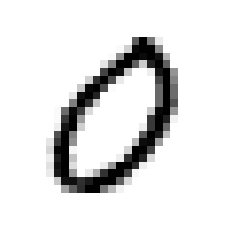

In [15]:
plt.imshow(X_train[0][:,:,0],cmap='binary')
plt.axis('off')

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [17]:
optimizer=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08,decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')

In [18]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                        patience=3,
                                        verbose=1,
                                        factor=0.5,
                                        mini_lr=0.00001)

In [19]:
epochs=30
batchsize=64
history=model.fit(X_train,y_train,batch_size=batchsize,epochs=epochs,validation_data=(X_val,y_val),
                 callbacks=[learning_rate_reduction])


Epoch 1/30
591/591 [==============================] - 15s 25ms/step - loss: 0.2240 - accuracy: 0.9283 - val_loss: 0.0883 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 2/30
591/591 [==============================] - 15s 25ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 0.0538 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 3/30
591/591 [==============================] - 15s 26ms/step - loss: 0.0505 - accuracy: 0.9851 - val_loss: 0.0431 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 4/30
591/591 [==============================] - 15s 25ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0375 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/30
591/591 [==============================] - 15s 25ms/step - loss: 0.0401 - accuracy: 0.9884 - val_loss: 0.0286 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 6/30
591/591 [==============================] - 15s 25ms/step - loss: 0.0383 - accuracy: 0.9888 - val_loss: 0.0311 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 7/30
591/591 [==============================] - 15s 

In [20]:
from keras.models import clone_model

In [21]:
model1=clone_model(model)
model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')

In [22]:
datagen=ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)
datagen.fit(X_train)

In [24]:
history_1=model1.fit(datagen.flow(X_train,y_train,batch_size=batchsize),epochs=epochs,
                             validation_data=(X_val,y_val),
                             callbacks=[learning_rate_reduction],steps_per_epoch=X_train.shape[0]//batchsize)

2023-07-04 11:34:42.079164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0667 - accuracy: 0.9804 - val_loss: 0.0433 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 2/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0694 - accuracy: 0.9807 - val_loss: 0.0349 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 3/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0694 - accuracy: 0.9808 - val_loss: 0.0359 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 4/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0669 - accuracy: 0.9822 - val_loss: 0.0284 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 5/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0717 - accuracy: 0.9814 - val_loss: 0.0401 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 6/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0726 - accuracy: 0.9808 - val_loss: 0.0329 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 7/30
590/590 [==============================] - 15s 

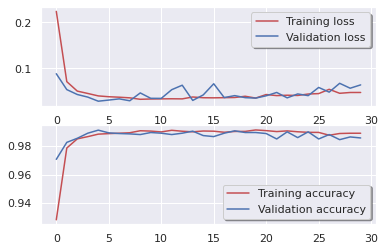

In [25]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='r',label='Training loss')
ax[0].plot(history.history['val_loss'],color='b',label='Validation loss')
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['accuracy'],color='r',label='Training accuracy')
ax[1].plot(history.history['val_accuracy'],color='b',label='Validation accuracy')
legend=ax[1].legend(loc='best',shadow=True)


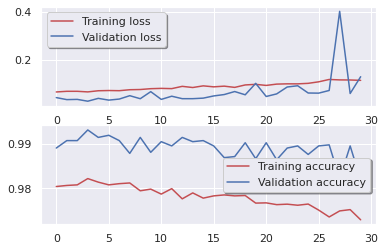

In [26]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history_1.history['loss'],color='r',label='Training loss')
ax[0].plot(history_1.history['val_loss'],color='b',label='Validation loss')
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history_1.history['accuracy'],color='r',label='Training accuracy')
ax[1].plot(history_1.history['val_accuracy'],color='b',label='Validation accuracy')
legend=ax[1].legend(loc='best',shadow=True)


In [27]:
ans=np.argmax(model.predict(X_val),axis=1)

132/132 [==============================] - 1s 5ms/step


In [28]:
ans.shape
real_ans=np.argmax(y_val,axis=1)

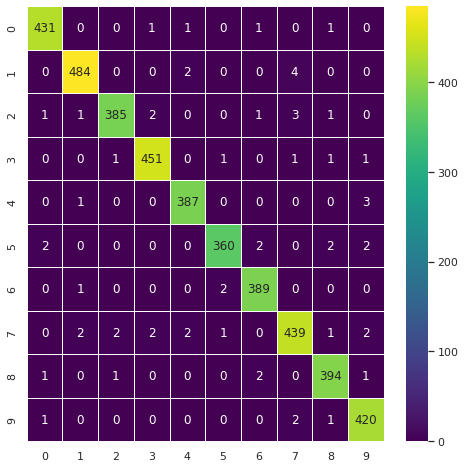

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(ans,real_ans),annot=True,cmap='viridis',linewidth=0.5,fmt='d')
plt.show()

In [30]:
result=np.argmax(model.predict(test),axis=1)

submission=pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':result
})

875/875 [==============================] - 4s 5ms/step


In [32]:
submission.to_csv('submission.csv',index=None)

In [33]:
result=np.argmax(model1.predict(test),axis=1)

submission=pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':result
})

875/875 [==============================] - 5s 5ms/step


In [34]:
submission.to_csv('submission.csv',index=None)

In [42]:
from keras.layers import BatchNormalization

In [43]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model2.add(BatchNormalization(axis=1))
model2.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization(axis=1))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',))
model2.add(BatchNormalization(axis=1))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(BatchNormalization(axis=1))

model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))

In [44]:
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')
history_2=model2.fit(X_train,y_train,batch_size=batchsize,epochs=epochs,validation_data=(X_val,y_val),
                 callbacks=[learning_rate_reduction])

Epoch 1/30
591/591 [==============================] - 18s 29ms/step - loss: 0.1241 - accuracy: 0.9630 - val_loss: 0.0884 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 2/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0820 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 3/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0638 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 4/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0331 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 5/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0423 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 6/30
591/591 [==============================] - 17s 29ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0402 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 7/30
591/591 [==============================] - 17s 

In [45]:
result=np.argmax(model2.predict(test),axis=1)

submission=pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':result
})

875/875 [==============================] - 5s 6ms/step


In [46]:
submission.to_csv('submission.csv',index=None)

In [47]:
model3=clone_model(model)
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='accuracy')

In [48]:
history_2=model3.fit(datagen.flow(X_train,y_train,batch_size=batchsize),epochs=epochs,
                             validation_data=(X_val,y_val),
                             callbacks=[learning_rate_reduction],steps_per_epoch=X_train.shape[0]//batchsize)

2023-07-04 12:09:04.129006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30
590/590 [==============================] - 15s 26ms/step - loss: 0.3748 - accuracy: 0.8785 - val_loss: 0.0633 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/30
590/590 [==============================] - 15s 25ms/step - loss: 0.1242 - accuracy: 0.9636 - val_loss: 0.0520 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 3/30
590/590 [==============================] - 15s 26ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.0545 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 4/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.0311 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 5/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0748 - accuracy: 0.9783 - val_loss: 0.0409 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 6/30
590/590 [==============================] - 15s 25ms/step - loss: 0.0737 - accuracy: 0.9796 - val_loss: 0.0311 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 7/30
590/590 [==============================] - 15s 

In [49]:
result=np.argmax(model2.predict(test),axis=1)

submission=pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':result
})

875/875 [==============================] - 5s 6ms/step


In [50]:
submission.to_csv('submission1.csv',index=None)